In [1]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

from PIL import Image
from matplotlib import cm

In [2]:
path = untar_data(URLs.MNIST,dest='.')
Path.BASE_PATH = path
path.ls()

(#2) [Path('testing'),Path('training')]

In [20]:
def convert_all_img_to_tensors(path):
    '''
        Convert all images to tensor by opening every directory in the path and 
        fetches the files in it one by one and converting to tensors simultaneously.
            Requires:
            path=Path class object
    '''
    all3s=[np.array(Image.open(o)) for o in (path).ls().sorted()]
    all3stensor=tensor(all3s)/255
    return all3stensor

In [21]:
def show_img(tensor_array,unnorm=True):
    '''
        Conver a tensor into a PIL image
        set unnorm = False if you did not normalized the tensor by 255
        default is True for unnorm
    '''
    pilnp=np.array(tensor_array)
    if unnorm:
        im=Image.fromarray(np.uint8(pilnp*255))
    else:
        im=Image.fromarray(np.uint8(pilnp))
    return im    

In [22]:
def mnist_distance(a,b): 
    '''
        Subtract two tensors and turn the negative diffrences to positive.Afterwards
        the mean is returned of the resulting values.
        (-1,-2) means to take the average from last dimension and second last dimension
        i.e across whole row and column
    '''
    return (a-b).abs().mean((-1,-2))


In [23]:
def predict(imglst):
    '''
        Returns the prediction of each tensor passed.
        Takes a tensor as an argument
    '''
    preds=list()
    for j in range(imglst.shape[0]):
        lstdist=np.array([mnist_distance(imglst[j],All_digits_mean[i]) for i in range(10)])
        preds.extend([np.argmin(lstdist)])
    return preds

In [24]:
def accuracy(preds,y):
    '''
        Checks and returns the percent of values in the the list matching with the value in the y.
        Requires:
        1. List of predicted values
        2. Y value
    '''
    chk=[(i==y) for i in preds]
    chk=np.array(chk)
    return chk.sum()/len(chk)
    

In [45]:
def debug_test_digit(digit,i):
    '''
        Use when you want to check the distance of an individual image with the means of every digit
    '''
    show_image(All_digits[digit][i]);
    lstdist=np.array([mnist_distance(All_digits[digit][i],All_digits_mean[p]) for p in range(10)])
    return pd.DataFrame(lstdist,columns=['Sorted closest digit']).sort_values(by='Sorted closest digit'), f' minimum distance with digit = {np.argmin(lstdist)}'


In [9]:
All_digit_path=(path/'training').ls().sorted()

In [10]:
All_digits=[convert_all_img_to_tensors(All_digit_path[i]) for i in list(range(10))]


In [11]:
All_digits_mean=[All_digits[i].mean(0) for i in range(10)]

In [38]:
avg_acc=np.array([accuracy(predict(All_digits[i]),i) for i in range(10)])

In [39]:
print(f'Accuracy on training set through mean strategy = {np.array(avg_acc).sum()/len(avg_acc)}')

Accuracy on training set through mean strategy = 0.64288621674314


In [28]:
def checking_on_valid():
    '''
        Checks the accuracy on the testing dataset
    '''
    All_digit_path_testing=(path/'testing').ls().sorted()
    
    All_digits_testing=[convert_all_img_to_tensors(All_digit_path_testing[i]) for i in list(range(10))]
    
    All_digits_mean_testing=[All_digits_testing[i].mean(0) for i in range(10)]
    
    avg_acc=np.array([accuracy(predict(All_digits_testing[i]),i) for i in range(10)])
    
    return f'Accuracy on testing set through mean strategy = {np.array(avg_acc).sum()/len(avg_acc)}'


In [15]:
checking_on_valid()

'Accuracy on testing set through mean strategy = 0.6610330933054313'

### Checking and evaluating the distance of the third image in the digit 5 training data set from the mean of all the digits 

(   Sorted closest digit
1              0.122167
5              0.125902
4              0.137532
8              0.140145
9              0.142994
6              0.149457
3              0.154690
7              0.155289
2              0.162891
0              0.170463, ' minimum distance with digit = 1')


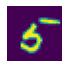

In [46]:
print(debug_test_digit(5,3))

(   Sorted closest digit
5              0.133417
1              0.133523
3              0.136085
7              0.144137
8              0.145668
9              0.149752
6              0.156139
2              0.163941
4              0.164997
0              0.169432, ' minimum distance with digit = 5')


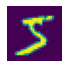

In [47]:
print(debug_test_digit(5,0))